%<br>
import libraries, load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
import sklearn.datasets
import seaborn as sns

In [3]:
import sklearn.decomposition

In [4]:
RANDOM_SEED = 4242
FEATURE_SUBSET = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
PCA_COMPONENTS=2

In [5]:
iris_dataset = sklearn.datasets.load_iris()
df = pd.DataFrame(
    data=iris_dataset['data'],
    columns=iris_dataset['feature_names']
)
df['target'] = iris_dataset['target']
df['target_labels'] = [iris_dataset['target_names'][x] for x in iris_dataset['target']]


 ### 3D plot


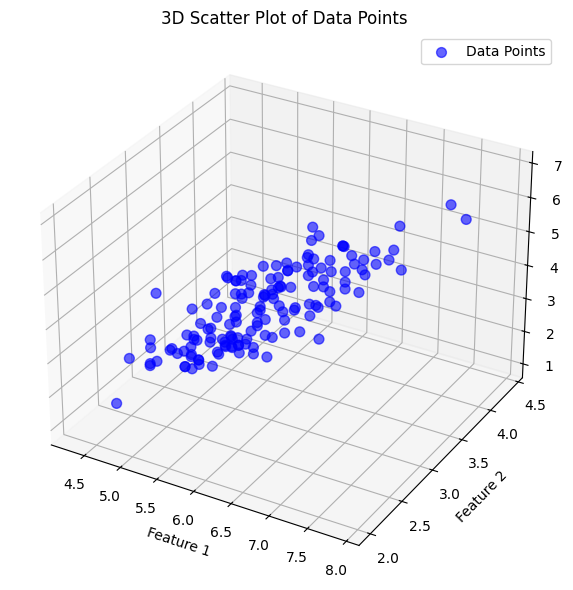

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[FEATURE_SUBSET[0]],
           df[FEATURE_SUBSET[1]],
           df[FEATURE_SUBSET[2]],
           c='blue',
           marker='o',
           s=50,
           alpha=0.6,
           label='Data Points')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Data Points')
ax.legend()

plt.tight_layout()
plt.show()

%<br>
 apply PCA

In [7]:
model_pca = sklearn.decomposition.PCA(
    n_components=PCA_COMPONENTS,
    random_state=RANDOM_SEED
).fit(df[FEATURE_SUBSET])

/tmp/ipython-input-9-4257970965.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(


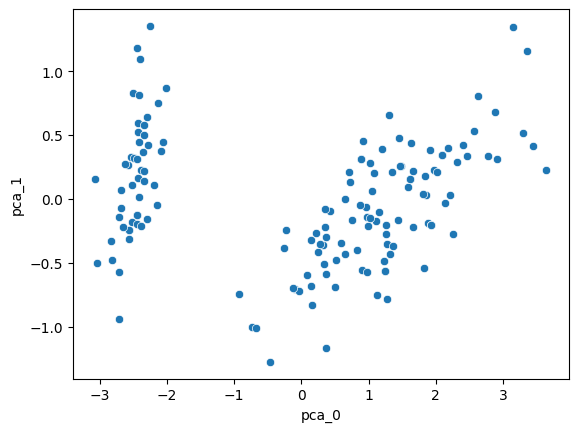

In [9]:
reduced_dataset = model_pca.transform(df[FEATURE_SUBSET])
df['pca_0'] = reduced_dataset[:, 0]
df['pca_1'] = reduced_dataset[:, 1]
plt.figure('PCA projection')
ax = sns.scatterplot(
    data=df,
    x='pca_0',
    y='pca_1',
    #hue='target_labels',
    palette='tab10',
    marker='o',
    alpha=1
)
# remove legend
plt.legend([], [], frameon=False)
plt.show()

%<br>
visualize elbow

In [10]:
model_pca.explained_variance_ratio_

array([0.92464061, 0.06046599])

In [11]:
np.cumsum(model_pca.explained_variance_ratio_)

array([0.92464061, 0.9851066 ])

In [12]:
cumulative_sum = np.cumsum(model_pca.explained_variance_ratio_)
# get num of dimensions that encode at least 95% of information
num_dimensions = np.argmax(cumulative_sum >= 0.95) + 1

<Axes: >

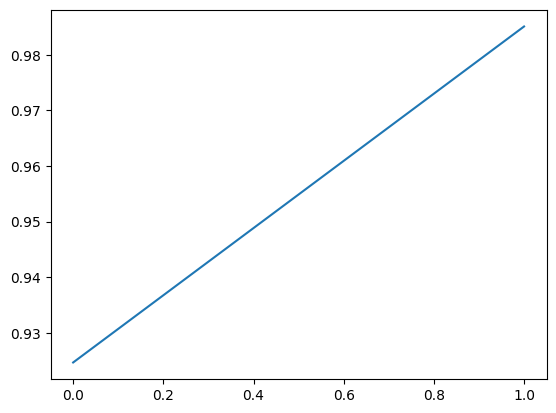

In [13]:
sns.lineplot(cumulative_sum)

%%